In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("/content/train.csv")
features=pd.read_csv("/content/features.csv")
stores=pd.read_csv("/content/stores.csv")
test=pd.read_csv("/content/test.csv")

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [9]:
train[train.duplicated()]
train.drop_duplicates(inplace=True)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [10]:
features[features.duplicated()]
features.drop_duplicates(inplace=True)
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [11]:
stores[stores.duplicated()]
stores.drop_duplicates(inplace=True)
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
data_merge = pd.merge(stores,features,on=['Store'])

In [13]:
data_merge.isnull().sum()

Store              0
Type               0
Size               0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [14]:
data_merge["Date"].value_counts()

2010-02-05    45
2012-04-13    45
2012-04-27    45
2012-05-04    45
2012-05-11    45
              ..
2011-04-15    45
2011-04-22    45
2011-04-29    45
2011-05-06    45
2013-07-26    45
Name: Date, Length: 182, dtype: int64

In [15]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [16]:
data_merge.columns

Index(['Store', 'Type', 'Size', 'Date', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday'],
      dtype='object')

In [17]:
data=pd.merge(data_merge,train,on=['Store','Date','IsHoliday'])

In [18]:
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [19]:
data.shape

(421570, 16)

In [20]:
data.nunique()

Store               45
Type                 3
Size                40
Date               143
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
IsHoliday            2
Dept                81
Weekly_Sales    359464
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  object        
 2   Size          421570 non-null  int64         
 3   Date          421570 non-null  datetime64[ns]
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     150681 non-null  float64       
 7   MarkDown2     111248 non-null  float64       
 8   MarkDown3     137091 non-null  float64       
 9   MarkDown4     134967 non-null  float64       
 10  MarkDown5     151432 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

In [22]:
data.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64

In [23]:
data = data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000


In [25]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['week'] = data['Date'].dt.week

<Axes: xlabel='week'>

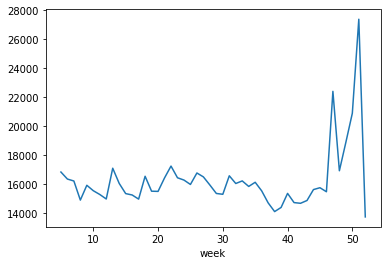

In [26]:
weekly_sales_2010 = data[data['Year']==2010]['Weekly_Sales'].groupby(data['week']).mean()

sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)

<Axes: xlabel='week'>

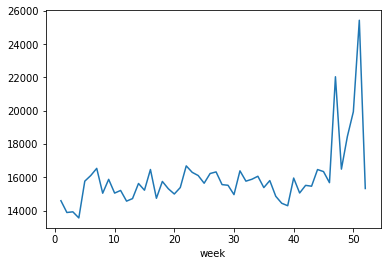

In [27]:
weekly_sales_2010 = data[data['Year']==2011]['Weekly_Sales'].groupby(data['week']).mean()

sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)

<Axes: xlabel='week'>

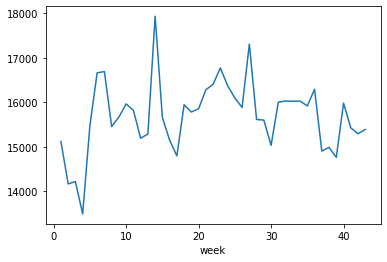

In [28]:
weekly_sales_2010 = data[data['Year']==2012]['Weekly_Sales'].groupby(data['week']).mean()

sns.lineplot(x=weekly_sales_2010.index, y=weekly_sales_2010.values)

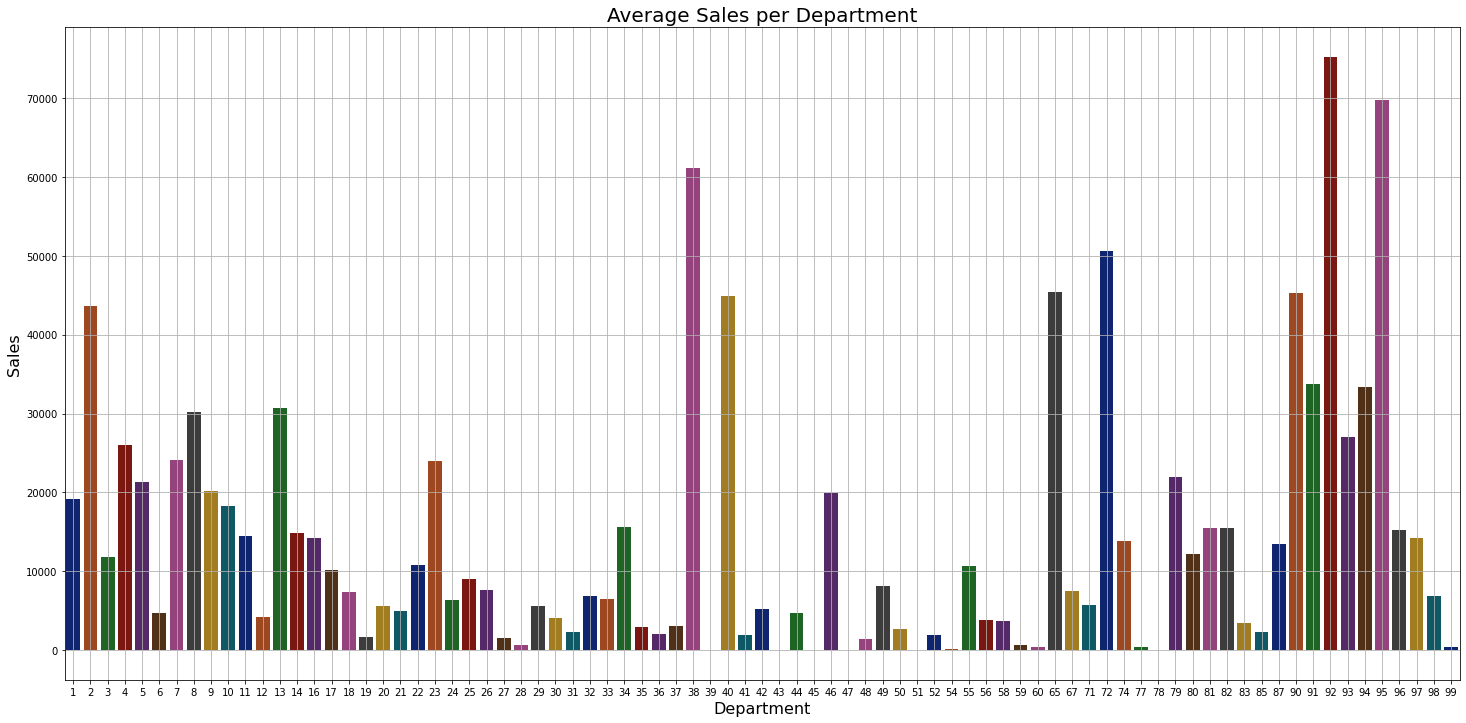

In [29]:
# Average Sales per Department

weekly_sales = data['Weekly_Sales'].groupby(data['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

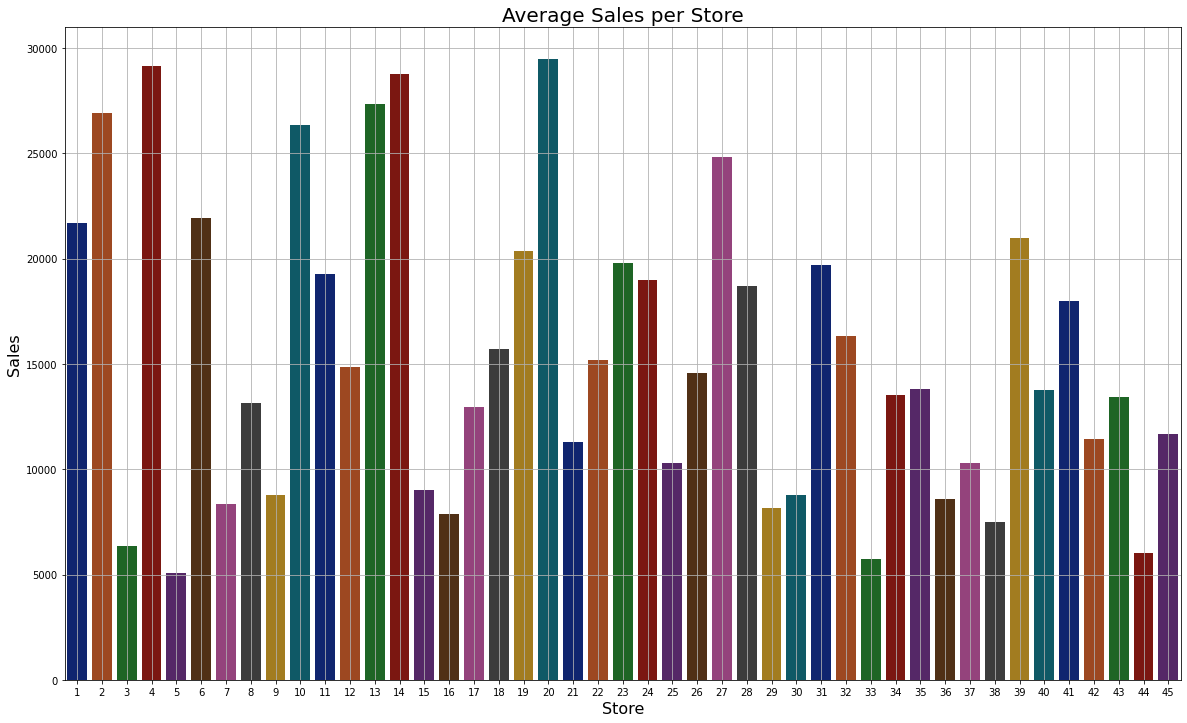

In [30]:
# Average Sales per Store

weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

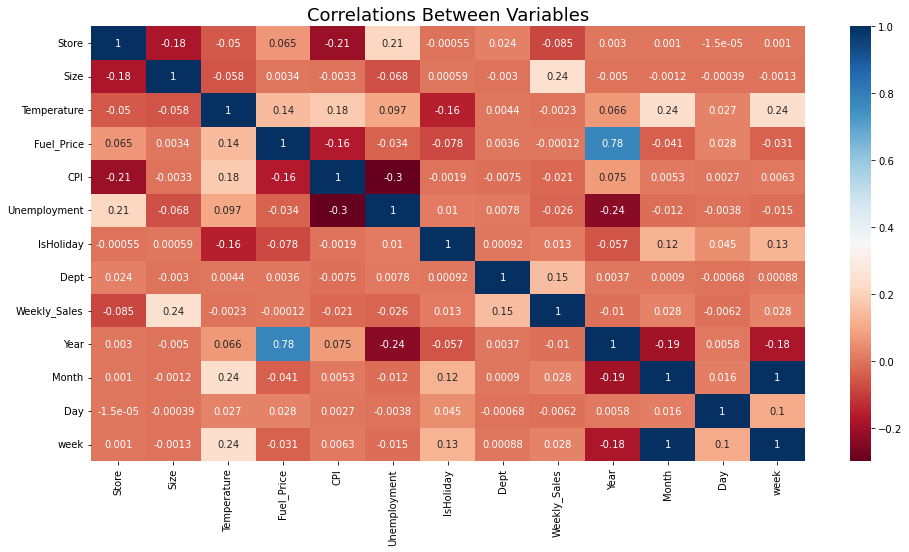

In [31]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=18)
plt.show()

In [32]:
data=data.drop(['Fuel_Price'],axis=1)

In [33]:
data_num=data[['Store','Size','Temperature','CPI','Unemployment','Dept','Weekly_Sales']]
data_num.head()

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales
0,1,151315,42.31,211.096358,8.106,1,24924.50
1,1,151315,42.31,211.096358,8.106,2,50605.27
2,1,151315,42.31,211.096358,8.106,3,13740.12
3,1,151315,42.31,211.096358,8.106,4,39954.04
4,1,151315,42.31,211.096358,8.106,5,32229.38


In [34]:
data_num=data[['Store','Size','Temperature','CPI','Unemployment','Dept','Weekly_Sales']]
data_num.head()

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales
0,1,151315,42.31,211.096358,8.106,1,24924.50
1,1,151315,42.31,211.096358,8.106,2,50605.27
2,1,151315,42.31,211.096358,8.106,3,13740.12
3,1,151315,42.31,211.096358,8.106,4,39954.04
4,1,151315,42.31,211.096358,8.106,5,32229.38


In [35]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num.head()

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales
0,0.0,0.630267,0.434149,0.8405,0.405118,0.000000,0.042851
1,0.0,0.630267,0.434149,0.8405,0.405118,0.010204,0.079638
2,0.0,0.630267,0.434149,0.8405,0.405118,0.020408,0.026829
3,0.0,0.630267,0.434149,0.8405,0.405118,0.030612,0.064380
4,0.0,0.630267,0.434149,0.8405,0.405118,0.040816,0.053315


In [36]:
# Converting 'Type' column to numerical
type_mapping = {'A': 1, 'B': 2, 'C': 3}
data['Type'] = data['Type'].map(type_mapping)

# Converting 'IsHoliday' column to numerical
holiday_mapping = {False: 0, True: 1}
data['IsHoliday'] = data['IsHoliday'].map(holiday_mapping)

In [37]:
data_final = pd.concat([data_num,data['Type'],data['IsHoliday']],axis=1)
data_final.head()

,Store,Size,Temperature,CPI,Unemployment,Dept,Weekly_Sales,Type,IsHoliday
0,0.0,0.630267,0.434149,0.8405,0.405118,0.000000,0.042851,1,0
1,0.0,0.630267,0.434149,0.8405,0.405118,0.010204,0.079638,1,0
2,0.0,0.630267,0.434149,0.8405,0.405118,0.020408,0.026829,1,0
3,0.0,0.630267,0.434149,0.8405,0.405118,0.030612,0.064380,1,0
4,0.0,0.630267,0.434149,0.8405,0.405118,0.040816,0.053315,1,0


In [38]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  float64
 1   Size          421570 non-null  float64
 2   Temperature   421570 non-null  float64
 3   CPI           421570 non-null  float64
 4   Unemployment  421570 non-null  float64
 5   Dept          421570 non-null  float64
 6   Weekly_Sales  421570 non-null  float64
 7   Type          421570 non-null  int64  
 8   IsHoliday     421570 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 48.3 MB


In [39]:
data_final.shape

(421570, 9)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = data_final.drop(['Weekly_Sales'],axis=1)
Y = data_final['Weekly_Sales']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [44]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x_train)

In [45]:
poly_reg = PolynomialFeatures(degree=4)
X_train_2d = poly_reg.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
y_pred = lin_reg.predict(X_train_2d)

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [47]:
mse = mean_squared_error(y_train,y_pred)
mae = mean_absolute_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Mean Absolute error:", mae)
print("Mean squared error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute error: 0.016984384878284048
Mean squared error: 0.000758000105529952
Root Mean Squared Error: 0.02753180171238257
R-squared: 0.28036989900223386


In [48]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(x_train,y_train)
trainpreds_ridgereg=ridgereg.predict(x_train)

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_ridgereg)
mse = mean_squared_error(y_train, trainpreds_ridgereg)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_ridgereg)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.02082772158608626
Mean Squared Error: 0.0009628255073891742
Root Mean Squared Error: 0.031029429698097487
R-squared: 0.08591276957504568


In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
trainpreds_dtr=dtr.predict(x_train)

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae = mean_absolute_error(y_train, trainpreds_dtr)
mse = mean_squared_error(y_train, trainpreds_dtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, trainpreds_dtr)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4.029429828126934e-12
Mean Squared Error: 4.758020947662129e-20
Root Mean Squared Error: 2.181288827198757e-10
R-squared: 1.0
